In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('train.csv')
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [4]:
one_hot_categorical_columns=[]
for column in df.columns[:-1]:
    if df[column].nunique() <=2:
        one_hot_categorical_columns.append(column)
        print(f'The {column} has {df[column].nunique()} elements')
        print(f'The unique values in the {column} are {df[column].unique()}\n')
len(one_hot_categorical_columns)

The blue has 2 elements
The unique values in the blue are [0 1]

The dual_sim has 2 elements
The unique values in the dual_sim are [0 1]

The four_g has 2 elements
The unique values in the four_g are [0 1]

The three_g has 2 elements
The unique values in the three_g are [0 1]

The touch_screen has 2 elements
The unique values in the touch_screen are [0 1]

The wifi has 2 elements
The unique values in the wifi are [1 0]



6

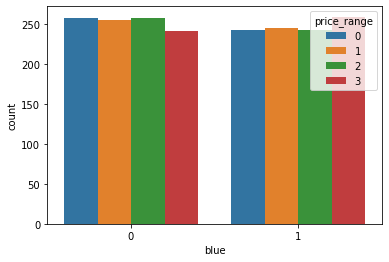

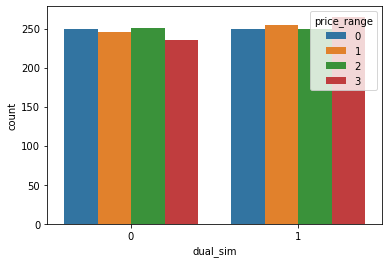

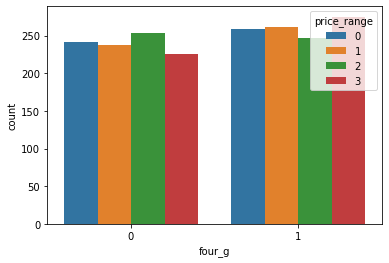

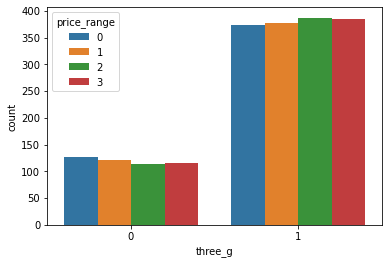

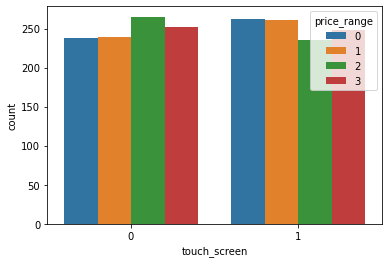

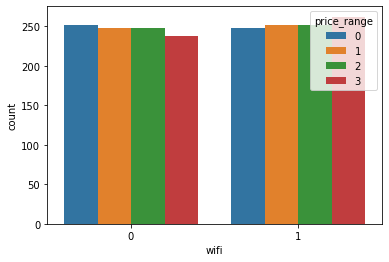

In [5]:
for column in one_hot_categorical_columns:
    sns.countplot(df[column],hue=df['price_range'])
    plt.show()

In [6]:
categorical_columns=[]
for column in df.columns[:-1]:
    if df[column].nunique()>2 and df[column].nunique()<=0.5*(len(df)) and df[column].dtype=='int64':
        categorical_columns.append(column)
        print(f'The {column} has {df[column].nunique()} elements')
len(categorical_columns)

The fc has 20 elements
The int_memory has 63 elements
The mobile_wt has 121 elements
The n_cores has 8 elements
The pc has 21 elements
The sc_h has 15 elements
The sc_w has 19 elements
The talk_time has 19 elements


8

In [7]:
# large_categorical_columns=[]
# for column in df.columns[:-1]:
#     if df[column].nunique()>=0.5*(len(df)) and df[column].dtype=='int64':
#         large_categorical_columns.append(column)
#         print(f'The {column} has {df[column].nunique()} elements')
# len(large_categorical_columns)

In [8]:
continuous_columns=[]
for column in df.columns[:-1]:
    if df[column].dtype=='float64' or (df[column].nunique()>=0.5*(len(df)) and df[column].dtype=='int64'):
        print(f'The {column} is a continuous variable')
        # print(f'The {column} has {df[column].unique()}\n')
        continuous_columns.append(column)
len(continuous_columns)

The battery_power is a continuous variable
The clock_speed is a continuous variable
The m_dep is a continuous variable
The px_height is a continuous variable
The px_width is a continuous variable
The ram is a continuous variable


6

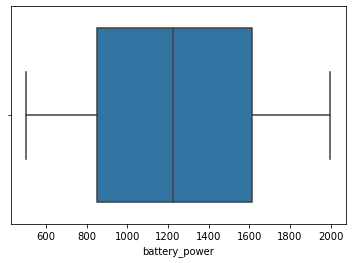

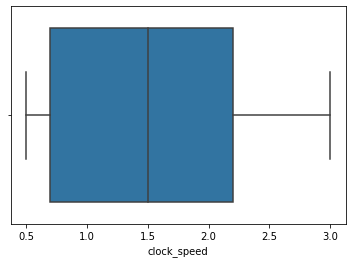

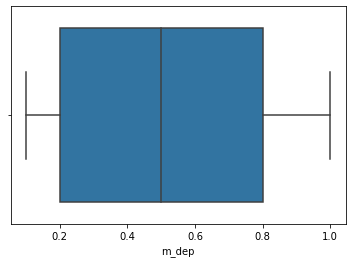

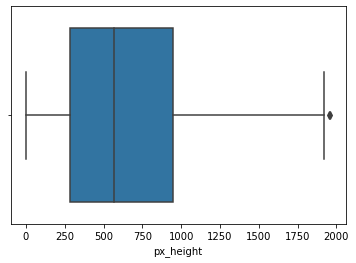

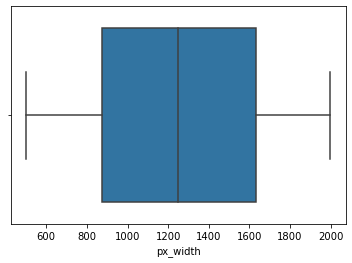

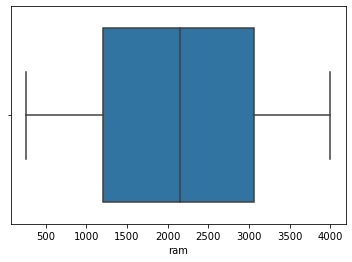

In [9]:
for column in continuous_columns:
    # plt.figure(figsize=(20,12))
    sns.boxplot((df[column]))
    plt.show()

In [10]:
df['fc'].unique()

array([ 1,  0,  2, 13,  3,  4,  5,  7, 11, 12, 16,  6, 15,  8,  9, 10, 18,
       17, 14, 19], dtype=int64)

In [11]:
df[['fc','price_range']].value_counts().reset_index().rename(columns={0:'count'})

,fc,price_range,count
0,0,1,124
1,0,0,121
2,0,2,121
3,0,3,108
4,1,3,70
...,...,...,...
70,14,2,2
71,17,1,2
72,18,3,2
73,15,0,1


In [12]:
# for column in categorical_columns:
#     encoded=df[[column,'price_range']].value_counts().reset_index().rename(columns={0:'count'})
#     for row in range(len(df)):
#         for value in range(len(encoded)):
#             if (df[column][row]==encoded[column][value] and df['price_range'][row]==encoded['price_range'][value]):
#                 df[column][row]=encoded['count'][value]

In [13]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [14]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler
minmax=MinMaxScaler()
standard=StandardScaler()
robust=RobustScaler()

In [15]:
def plot(df,column):
    fig,axes=plt.subplots(2,4,figsize=(20,12))
    plt.suptitle(f'Plot for {column}')
    sns.axisgrid
    sns.distplot(ax=axes[0,0],a=df[column],axlabel='Normal')
    sns.distplot(ax=axes[0,1],a=1/(df[column]+0.00001),axlabel='Reciprocal')
    sns.distplot(ax=axes[0,2],a=np.sqrt(df[column]),axlabel='Square root')
    sns.distplot(ax=axes[0,3],a=(df[column]**(1/3)),axlabel='Cube root')
    sns.distplot(ax=axes[1,0],a=(df[column]**(1/4)),axlabel='fourth root')
    sns.distplot(ax=axes[1,1],a=(df[column]**(1/5)),axlabel='fifth root')
    sns.distplot(ax=axes[1,2],a=np.log1p(df[column]),axlabel='Logarithmic')
    # sns.distplot(ax=axes[1,1],a=standard.fit_transform([df[column]]),axlabel='Standard')
    # sns.distplot(ax=axes[1,2],a=robust.fit_transform([df[column]]),axlabel='Robust')
    # sns.distplot(ax=axes[1,3],a=minmax.fit_transform([df[column]]),axlabel='Minmax')

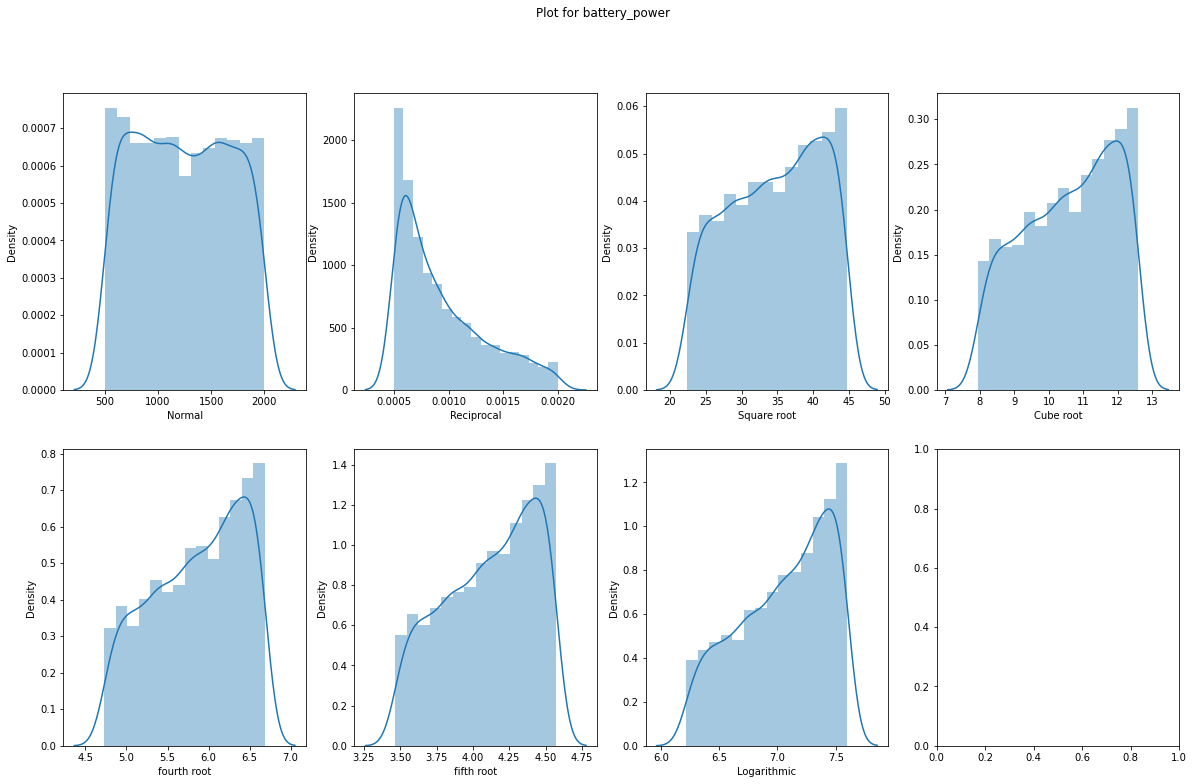

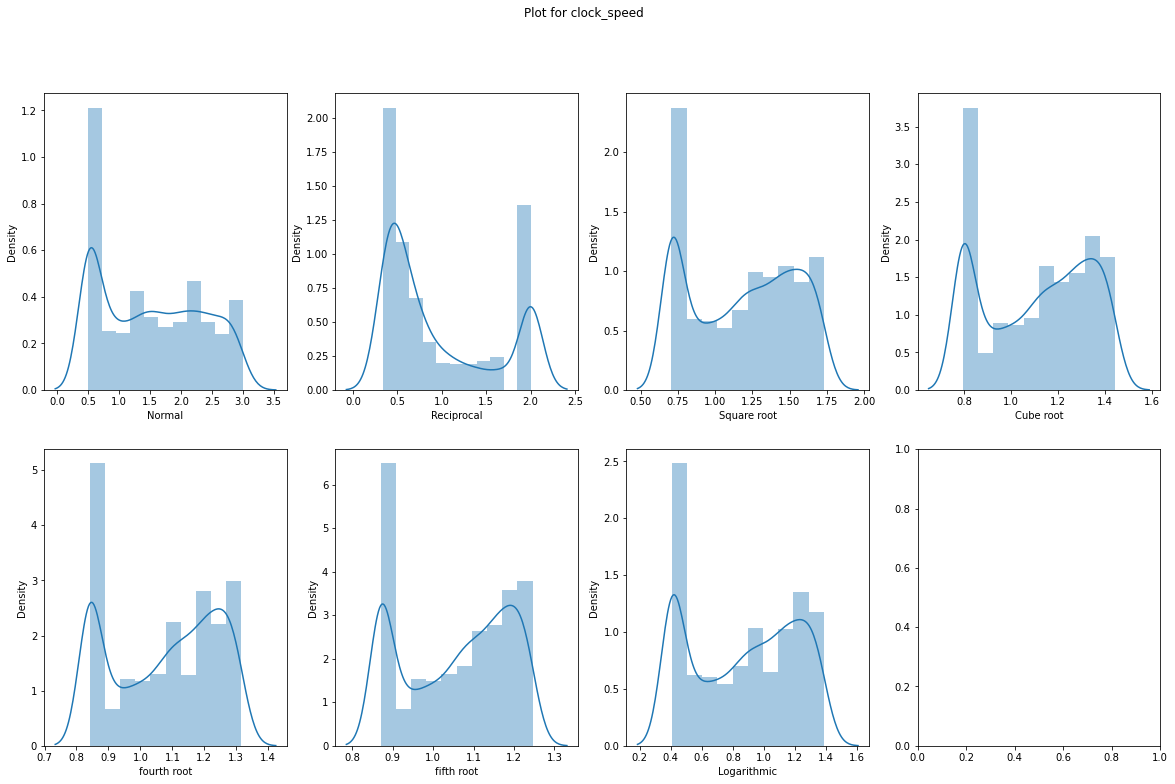

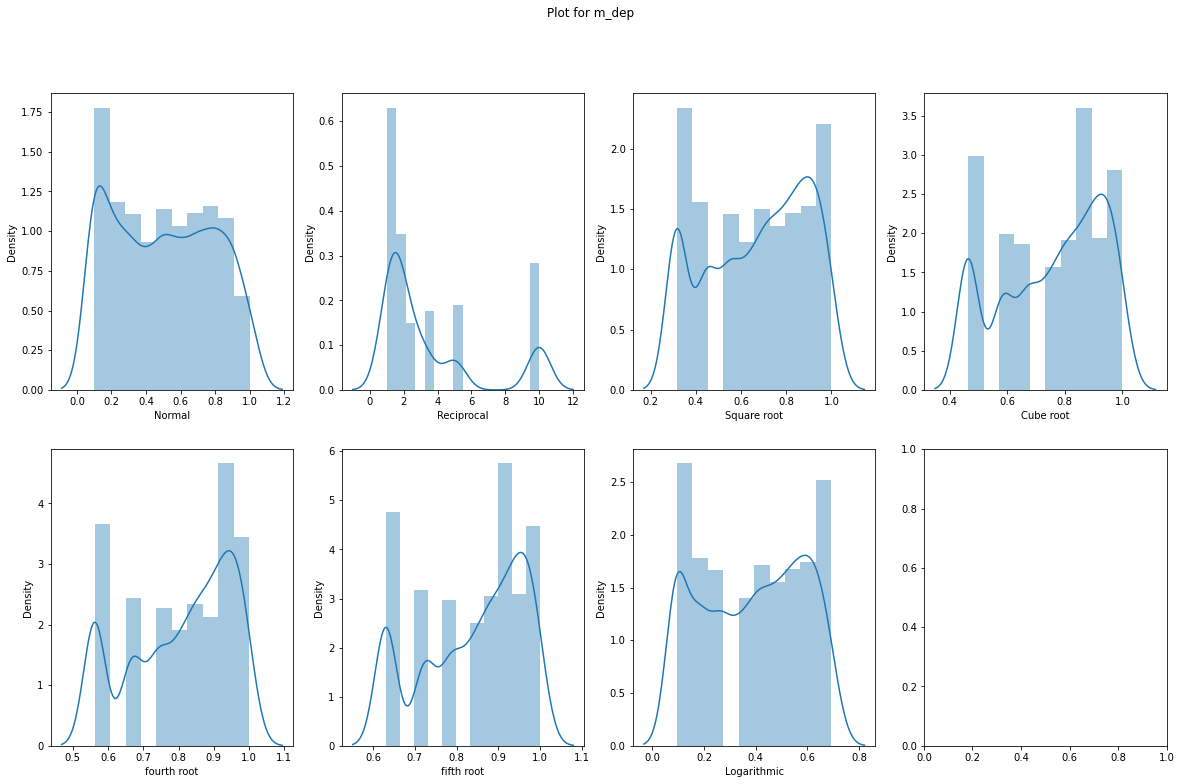

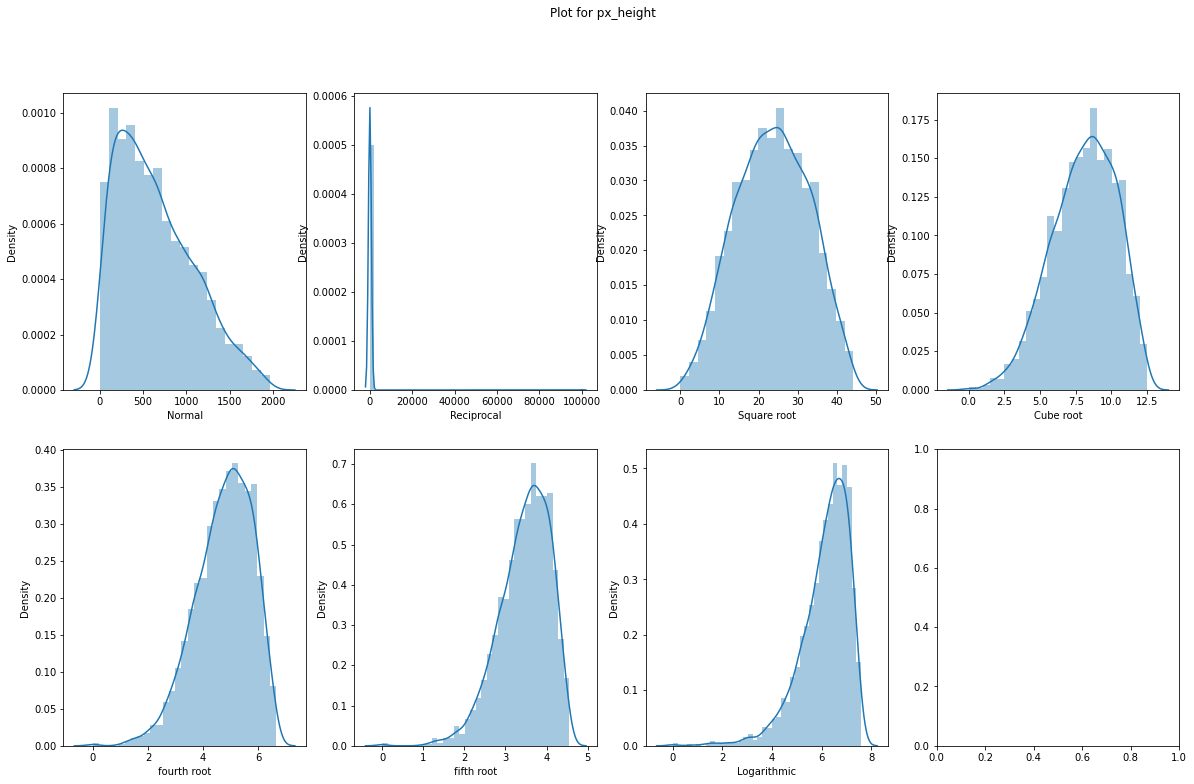

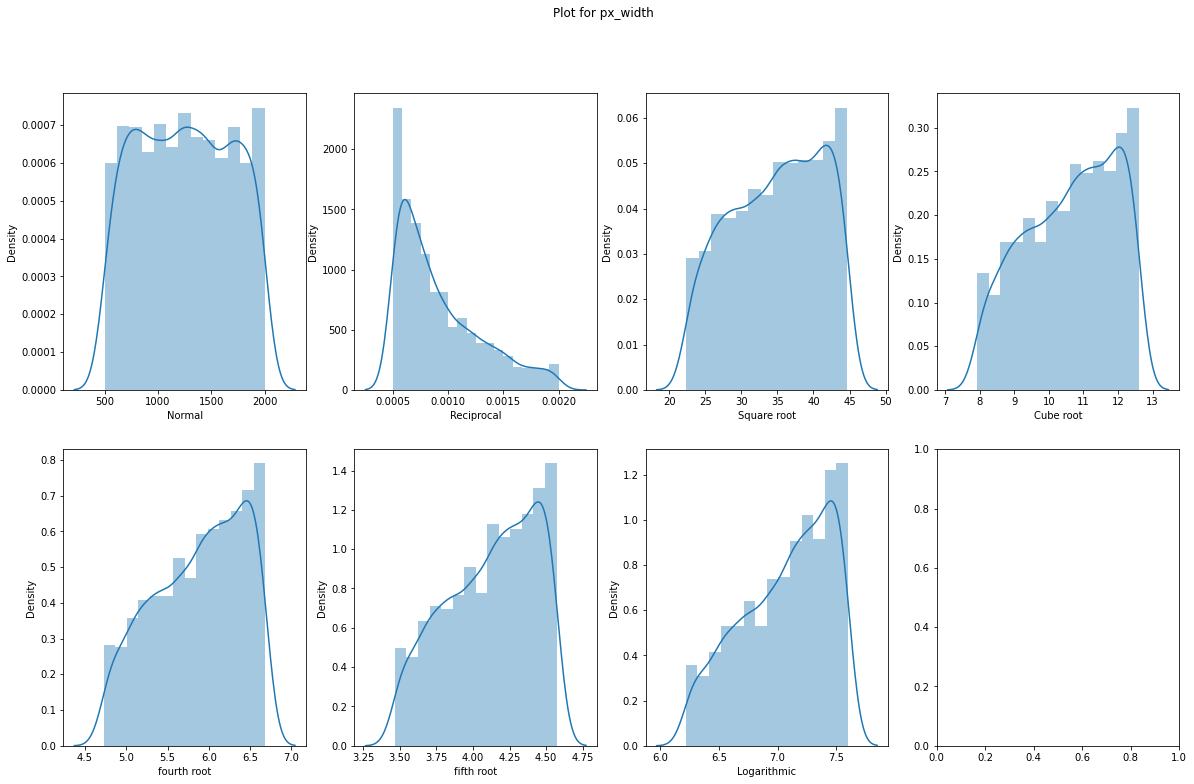

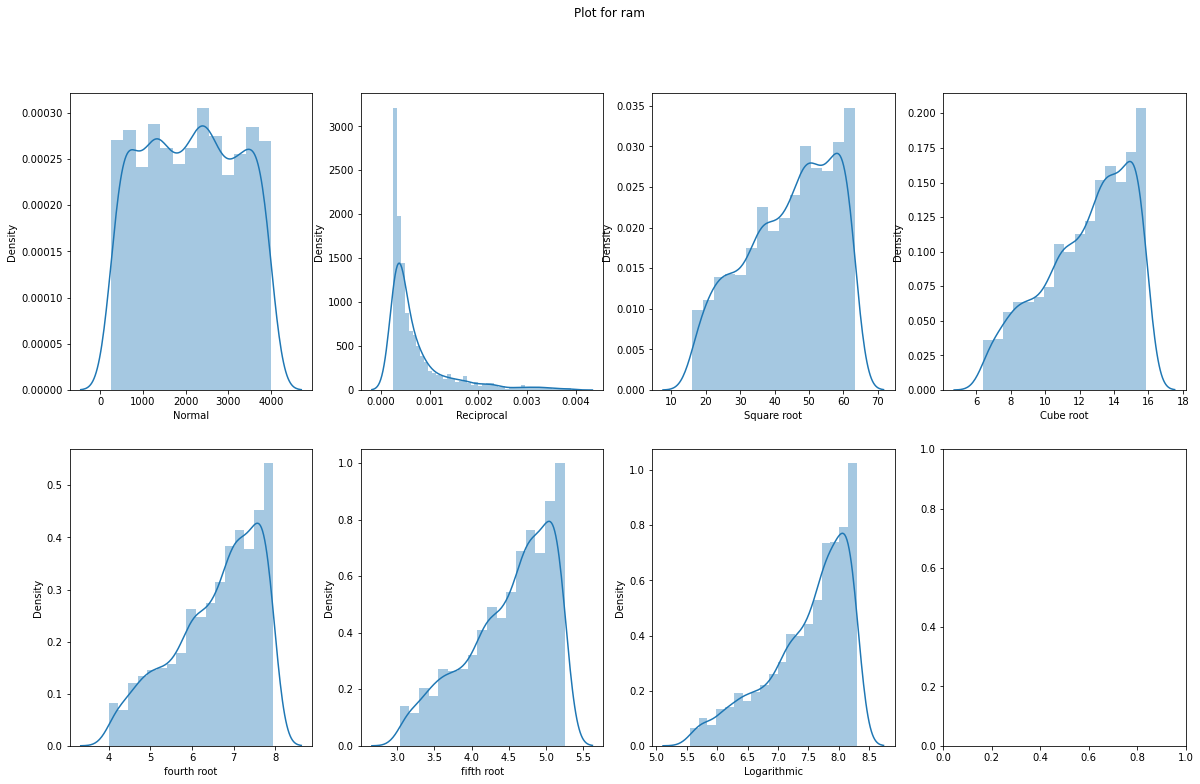

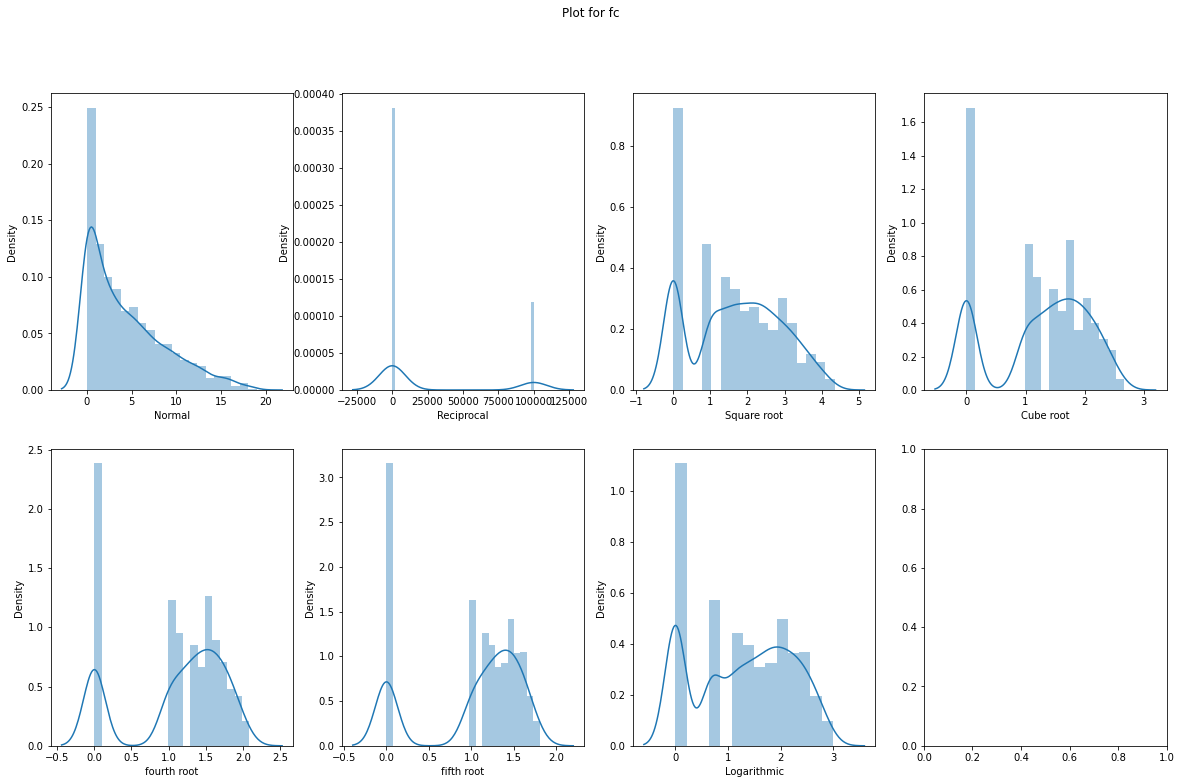

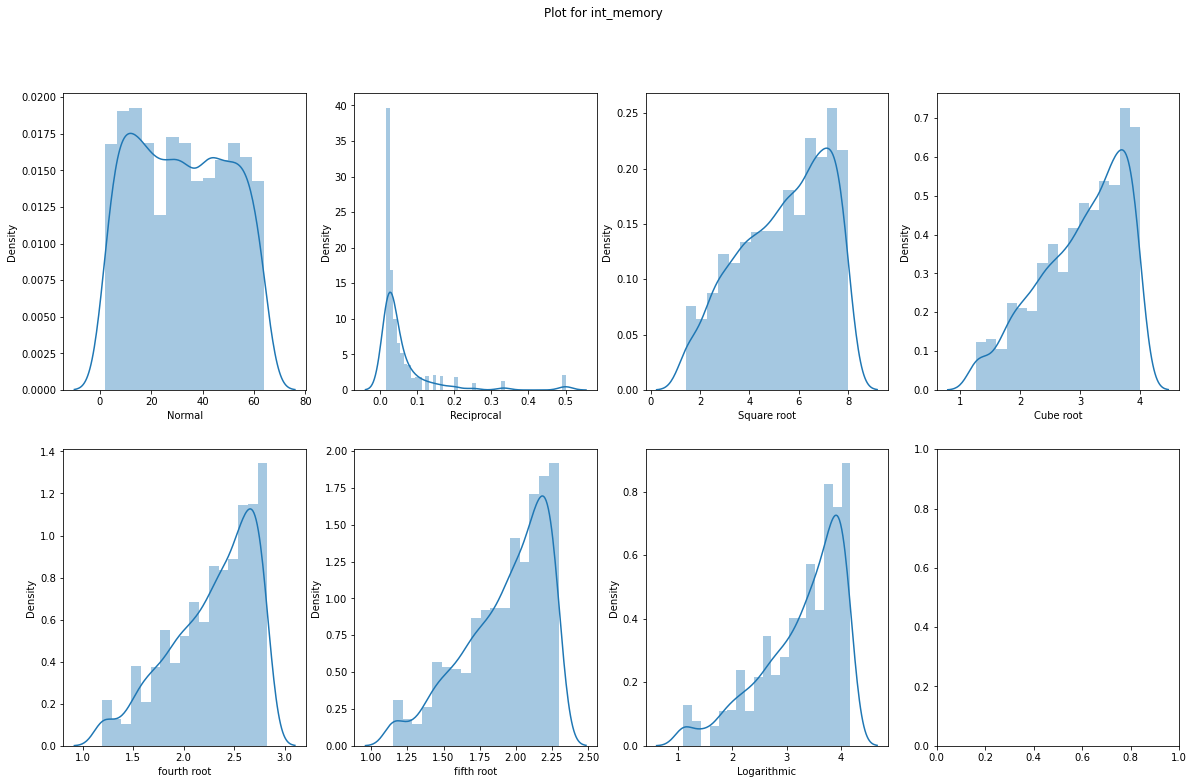

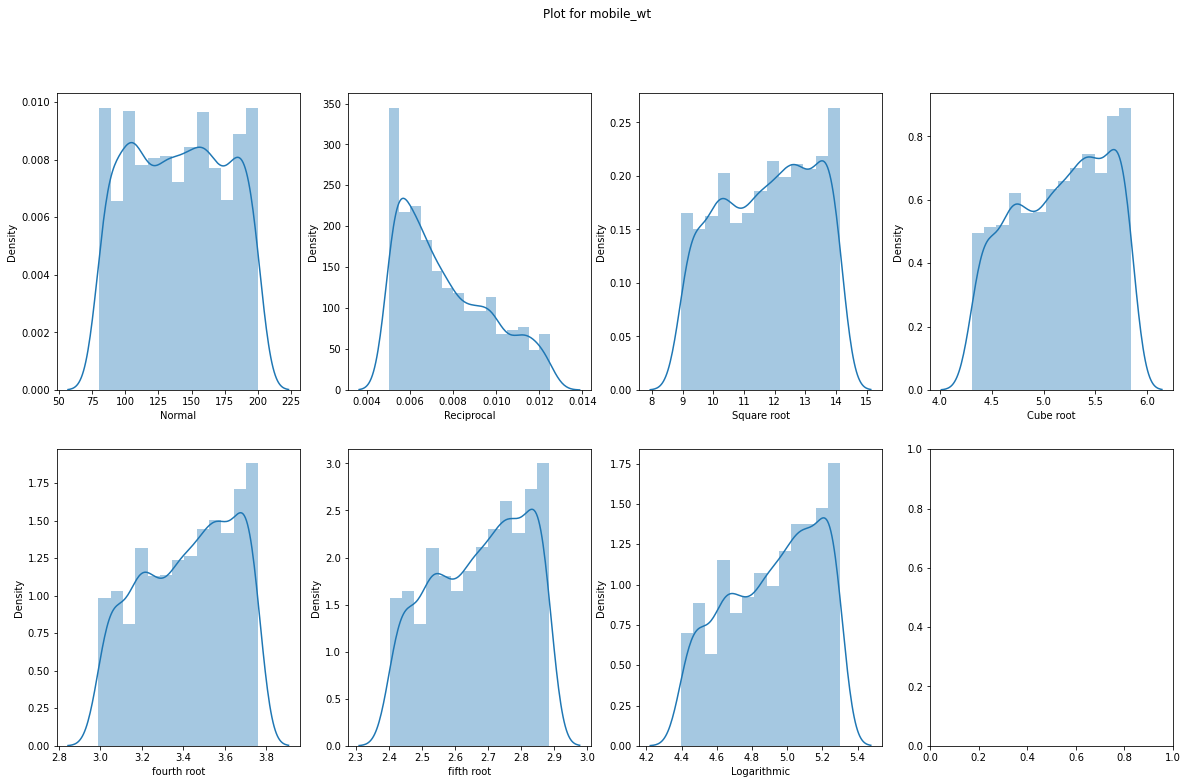

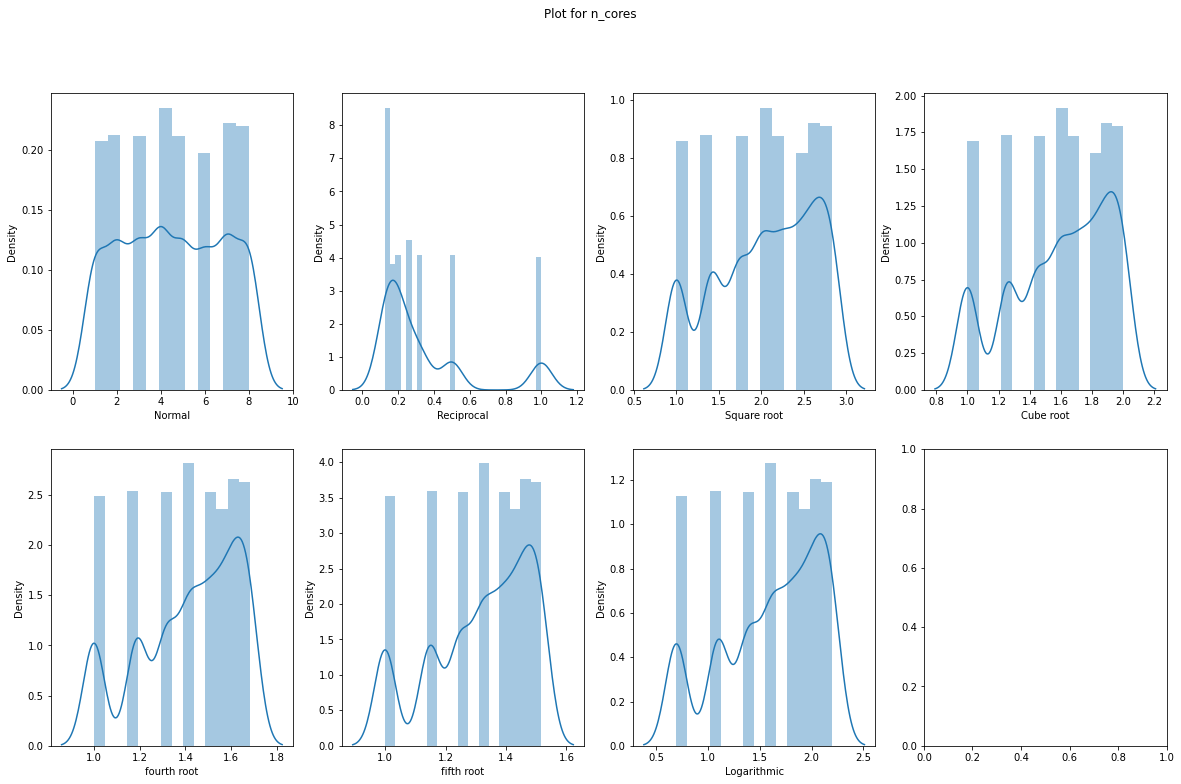

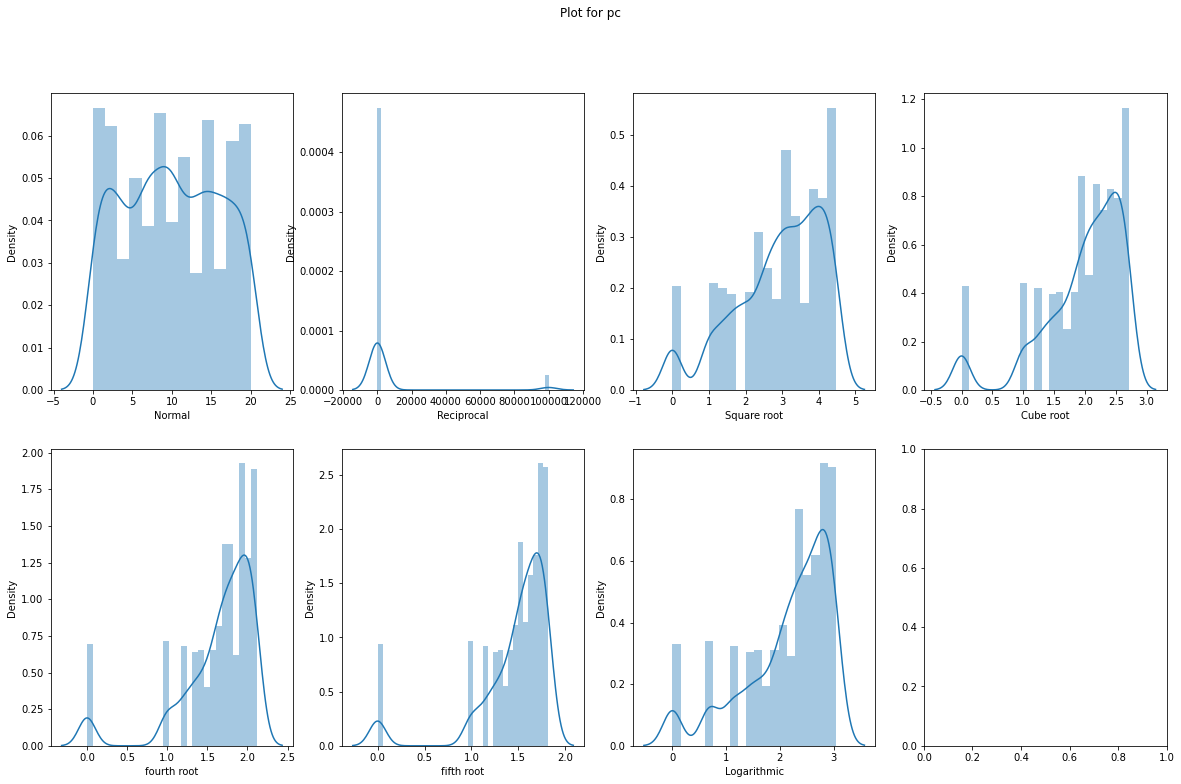

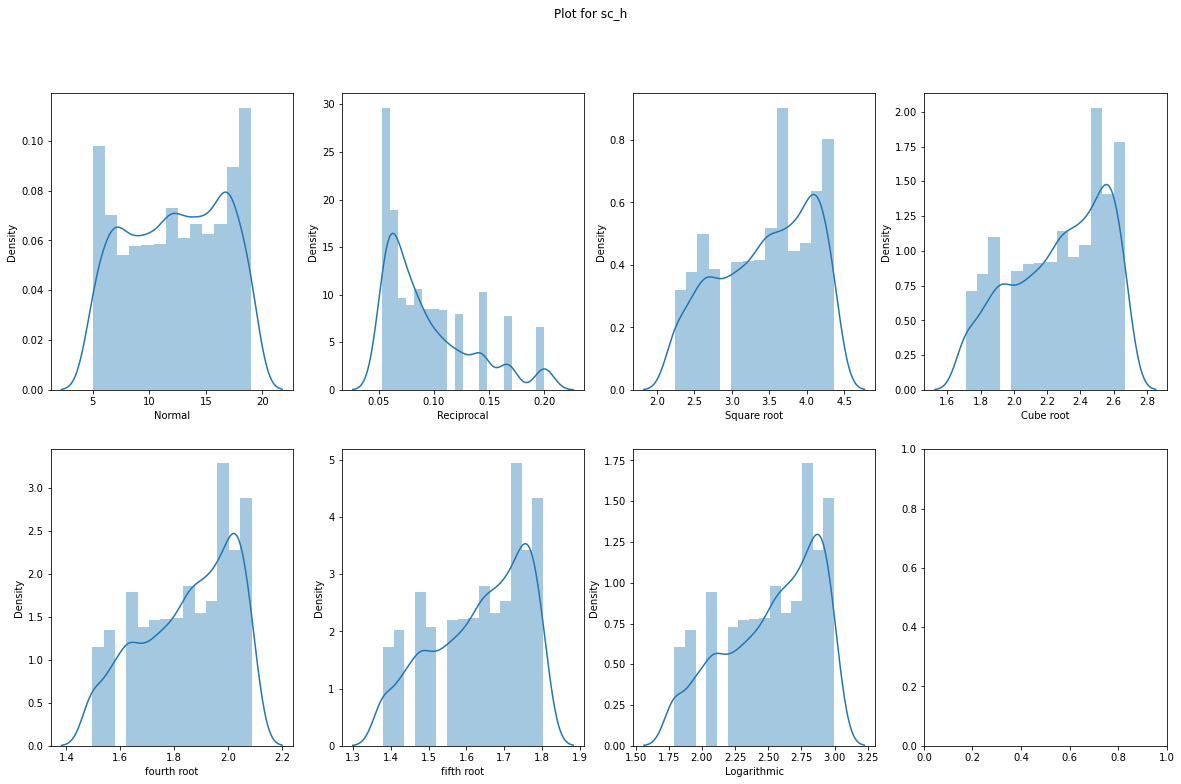

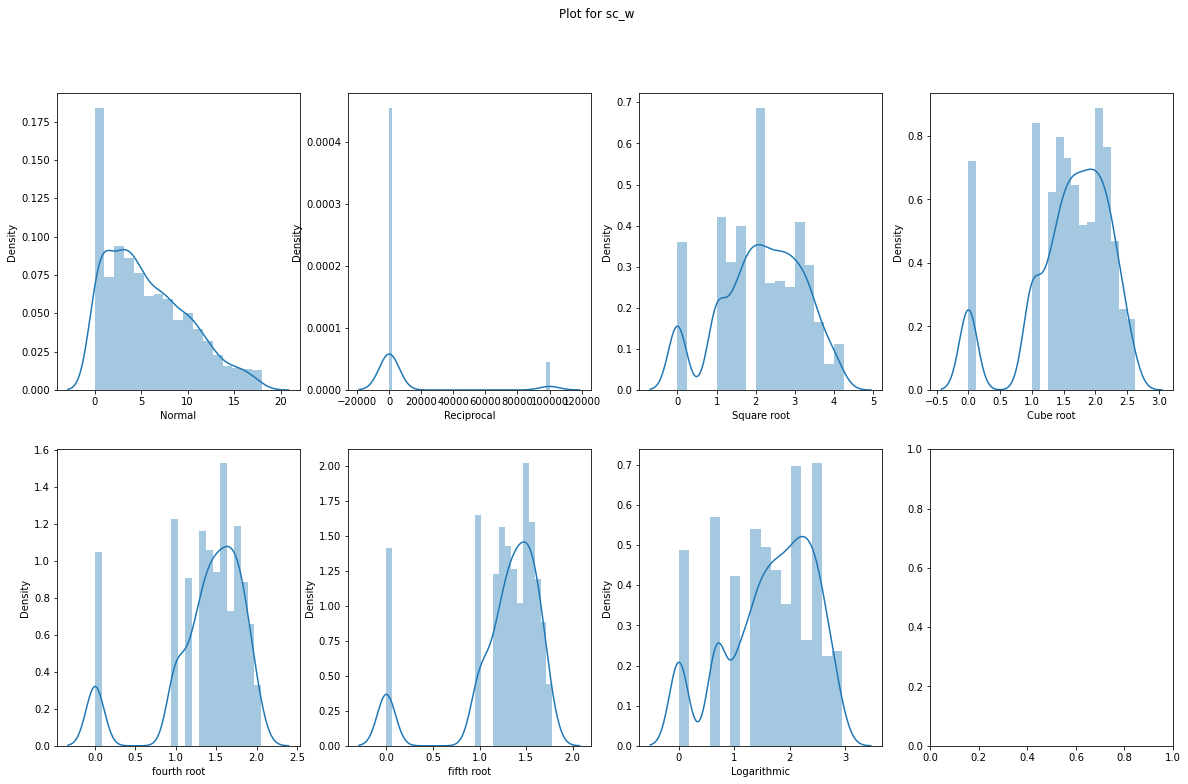

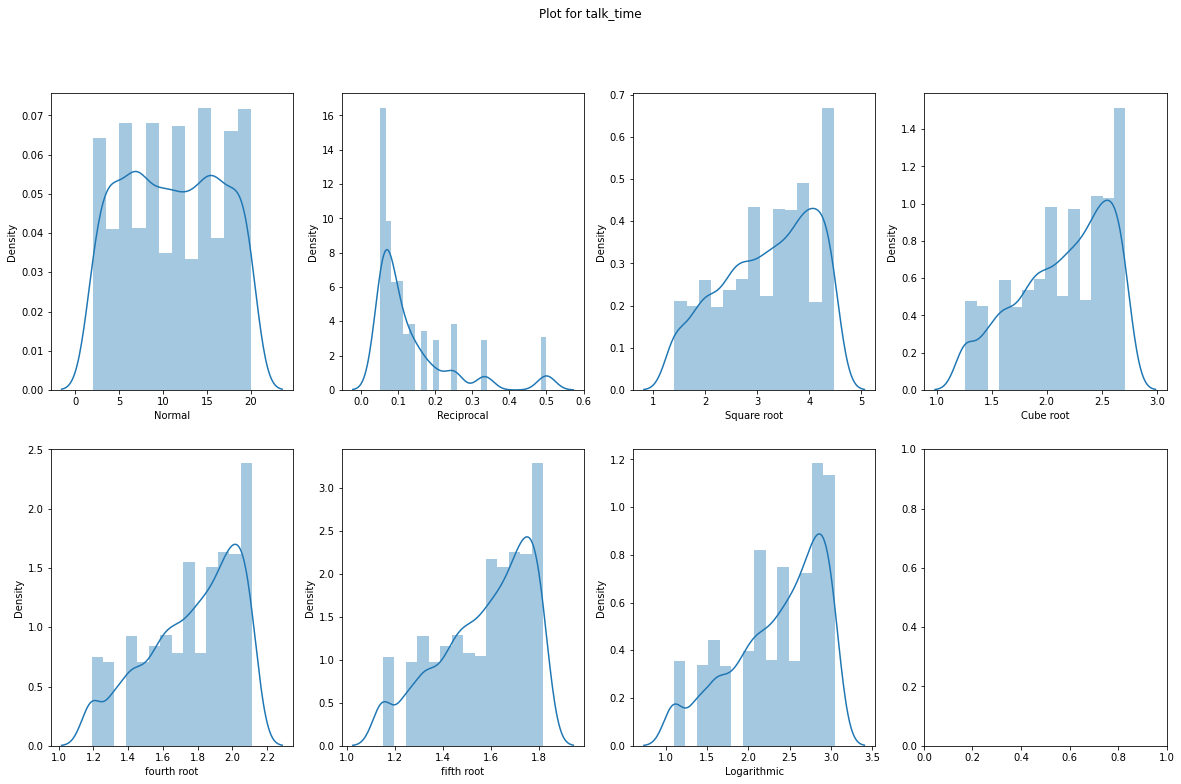

In [16]:
for column in continuous_columns+categorical_columns:
    plot(df,column)

In [17]:
df['clock_speed']=np.log1p(df['clock_speed'])
df['m_dep']=np.log1p(df['m_dep'])
df['px_height']=np.sqrt(df['px_height'])
df['fc']=np.log1p(df['fc'])
df['sc_w']=np.sqrt(df['sc_w'])

In [18]:
# df['clock_speed']=np.log1p(df['clock_speed'])
# df['m_dep']=np.log1p(df['m_dep'])
# df['px_height']=np.sqrt(df['px_height'])

In [19]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,1.163151,0,0.693147,0,7,0.470004,188,2,...,4.472136,756,2549,9,2.645751,19,0,0,1,1
1,1021,1,0.405465,1,0.000000,1,53,0.530628,136,3,...,30.083218,1988,2631,17,1.732051,7,1,1,0,2
2,563,1,0.405465,1,1.098612,1,41,0.641854,145,5,...,35.538711,1716,2603,11,1.414214,9,1,1,0,2
3,615,1,1.252763,0,0.000000,0,10,0.587787,131,6,...,34.871192,1786,2769,16,2.828427,11,1,0,0,2
4,1821,1,0.788457,0,2.639057,1,44,0.470004,141,2,...,34.756294,1212,1411,8,1.414214,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.405465,1,0.000000,1,2,0.587787,106,6,...,34.957117,1890,668,13,2.000000,19,1,1,0,0
1996,1965,1,1.280934,1,0.000000,0,39,0.182322,187,4,...,30.248967,1965,2032,11,3.162278,16,1,1,1,2
1997,1911,0,0.641854,1,0.693147,1,36,0.530628,108,8,...,29.461840,1632,3057,9,1.000000,5,1,1,0,3
1998,1512,0,0.641854,0,1.609438,1,46,0.095310,145,5,...,18.330303,670,869,18,3.162278,19,1,1,1,0


<AxesSubplot:>

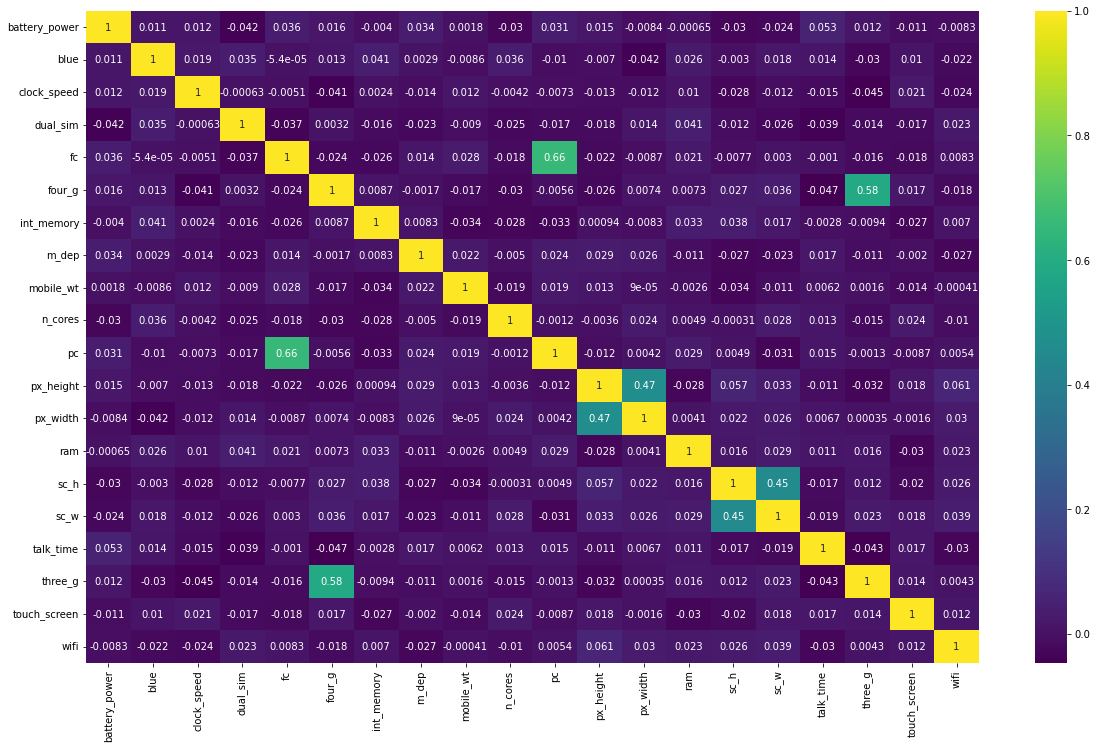

In [20]:
plt.figure(figsize=(20,12))
sns.heatmap(df.iloc[:,:-1].corr(),cmap='viridis',annot=True)

### As we see there isnt much correlation between features

### Lets build the model

In [21]:
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier,RandomForestClassifier
from sklearn.metrics import accuracy_score,auc,confusion_matrix,f1_score,classification_report

In [22]:
X=df.drop('price_range',axis=1)
y=df[['price_range']]

In [23]:
from sklearn.decomposition import PCA

In [24]:
pca=PCA()
pca.fit(X)

PCA()

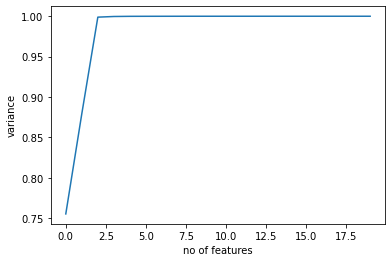

In [25]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('no of features')
plt.ylabel('variance')
plt.show()

In [26]:
from sklearn.feature_selection import f_regression,SelectKBest,f_classif
best=SelectKBest(f_classif,k=14)
X_new=pd.DataFrame(best.fit_transform(X,y),columns=X.columns[best.get_support()])
X_new

,battery_power,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,touch_screen
0,842.0,0.0,7.0,0.470004,188.0,2.0,2.0,4.472136,756.0,2549.0,9.0,2.645751,19.0,0.0
1,1021.0,1.0,53.0,0.530628,136.0,3.0,6.0,30.083218,1988.0,2631.0,17.0,1.732051,7.0,1.0
2,563.0,1.0,41.0,0.641854,145.0,5.0,6.0,35.538711,1716.0,2603.0,11.0,1.414214,9.0,1.0
3,615.0,0.0,10.0,0.587787,131.0,6.0,9.0,34.871192,1786.0,2769.0,16.0,2.828427,11.0,0.0
4,1821.0,1.0,44.0,0.470004,141.0,2.0,14.0,34.756294,1212.0,1411.0,8.0,1.414214,15.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794.0,1.0,2.0,0.587787,106.0,6.0,14.0,34.957117,1890.0,668.0,13.0,2.000000,19.0,1.0
1996,1965.0,0.0,39.0,0.182322,187.0,4.0,3.0,30.248967,1965.0,2032.0,11.0,3.162278,16.0,1.0
1997,1911.0,1.0,36.0,0.530628,108.0,8.0,3.0,29.461840,1632.0,3057.0,9.0,1.000000,5.0,1.0
1998,1512.0,1.0,46.0,0.095310,145.0,5.0,5.0,18.330303,670.0,869.0,18.0,3.162278,19.0,1.0


In [27]:
X_new_scaled=pd.DataFrame(standard.fit_transform(X_new),columns=standard.get_feature_names_out())
X_new_scaled

,battery_power,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,touch_screen
0,-0.902597,-1.043966,-1.380644,0.421246,1.349249,-1.101971,-1.305750,-2.074697,-1.146784,0.391703,-0.784983,0.463034,1.462493,-1.006018
1,-0.495139,0.957886,1.155024,0.731975,-0.120059,-0.664768,-0.645989,0.695085,1.704465,0.467317,1.114266,-0.401295,-0.734267,0.994018
2,-1.537686,0.957886,0.493546,1.302056,0.134244,0.209639,-0.645989,1.285084,1.074968,0.441498,-0.310171,-0.701958,-0.368140,0.994018
3,-1.419319,-1.043966,-1.215274,1.024937,-0.261339,0.646842,-0.151168,1.212894,1.236971,0.594569,0.876859,0.635838,-0.002014,-1.006018
4,1.325906,0.957886,0.658915,0.421246,0.021220,-1.101971,0.673534,1.200468,-0.091452,-0.657666,-1.022389,-0.701958,0.730240,0.994018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-1.011860,0.957886,-1.656260,1.024937,-0.967737,0.646842,0.673534,1.222186,1.477661,-1.342799,0.164641,-0.147825,1.462493,0.994018
1996,1.653694,-1.043966,0.383299,-1.053254,1.320993,-0.227564,-1.140810,0.713010,1.651235,-0.085031,-0.310171,0.951649,0.913303,0.994018
1997,1.530773,0.957886,0.217930,0.731975,-0.911225,1.521249,-1.140810,0.627884,0.880565,0.860139,-0.784983,-1.093789,-1.100394,0.994018
1998,0.622527,0.957886,0.769162,-1.499227,0.134244,0.209639,-0.810929,-0.575967,-1.345816,-1.157454,1.351672,0.951649,1.462493,0.994018


In [28]:
X_train,X_test,y_train,y_test=train_test_split(X_new_scaled,y,stratify=y,random_state=42,test_size=0.25)

In [29]:
logistic=LogisticRegression()
logistic_model=logistic.fit(X_train,y_train)
print('Classification Report\n',classification_report(y_test,logistic_model.predict(X_test)))
print('Confusion Matrix\n',confusion_matrix(y_test,logistic_model.predict(X_test)))
print('The train accuracy is',accuracy_score(y_train,logistic_model.predict(X_train)))
print('The test accuracy is',accuracy_score(y_test,logistic_model.predict(X_test)))
prediction=logistic_model.predict(X_test)
prediction

Classification Report
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       125
           1       0.97      0.97      0.97       125
           2       0.96      0.93      0.94       125
           3       0.95      0.98      0.96       125

    accuracy                           0.97       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.97      0.97      0.97       500

Confusion Matrix
 [[123   2   0   0]
 [  1 121   3   0]
 [  0   2 116   7]
 [  0   0   2 123]]
The train accuracy is 0.9646666666666667
The test accuracy is 0.966


array([1, 2, 2, 0, 3, 3, 3, 3, 3, 2, 3, 2, 3, 2, 3, 1, 0, 2, 0, 3, 1, 3,
       1, 0, 2, 0, 2, 0, 2, 3, 2, 3, 1, 2, 0, 1, 2, 3, 0, 0, 3, 2, 1, 0,
       3, 0, 3, 3, 2, 1, 0, 1, 2, 3, 0, 0, 2, 1, 0, 1, 0, 3, 0, 2, 2, 0,
       2, 1, 0, 1, 1, 3, 0, 0, 1, 2, 0, 1, 3, 2, 1, 3, 2, 1, 2, 1, 0, 3,
       3, 3, 2, 2, 0, 0, 0, 2, 2, 3, 3, 0, 3, 0, 3, 3, 0, 0, 2, 0, 0, 2,
       2, 3, 1, 0, 1, 1, 0, 0, 1, 3, 2, 1, 0, 3, 3, 0, 3, 3, 3, 1, 2, 3,
       2, 3, 3, 0, 0, 1, 3, 2, 2, 3, 3, 0, 0, 1, 3, 3, 2, 2, 3, 1, 2, 3,
       2, 1, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 2, 1, 1, 2, 3, 0, 3, 2, 0, 2,
       1, 0, 0, 2, 3, 3, 3, 0, 2, 0, 2, 3, 1, 1, 2, 1, 1, 1, 1, 2, 3, 3,
       3, 3, 2, 2, 2, 0, 2, 0, 3, 0, 1, 3, 0, 1, 3, 1, 2, 0, 2, 3, 1, 1,
       3, 1, 1, 1, 0, 2, 0, 2, 0, 1, 1, 0, 2, 2, 0, 0, 2, 1, 1, 2, 3, 3,
       2, 3, 2, 3, 2, 2, 1, 3, 3, 3, 1, 1, 3, 0, 2, 0, 1, 2, 1, 3, 0, 2,
       1, 2, 3, 2, 2, 1, 1, 2, 1, 1, 2, 1, 0, 0, 2, 1, 2, 2, 3, 0, 3, 2,
       0, 0, 0, 3, 1, 1, 2, 3, 2, 1, 1, 1, 3, 0, 0,

In [30]:
data=pd.read_csv('train.csv')
# data.drop('id',axis=1,inplace=True)
data.iloc[243].to_dict()

{'battery_power': 1918.0,
 'blue': 0.0,
 'clock_speed': 1.9,
 'dual_sim': 0.0,
 'fc': 2.0,
 'four_g': 0.0,
 'int_memory': 10.0,
 'm_dep': 0.6,
 'mobile_wt': 110.0,
 'n_cores': 5.0,
 'pc': 10.0,
 'px_height': 1170.0,
 'px_width': 1543.0,
 'ram': 1717.0,
 'sc_h': 7.0,
 'sc_w': 1.0,
 'talk_time': 16.0,
 'three_g': 1.0,
 'touch_screen': 1.0,
 'wifi': 1.0,
 'price_range': 2.0}

In [31]:
X_test

,battery_power,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,touch_screen
894,0.588383,-1.043966,-0.002563,0.731975,-1.363320,-0.664768,-0.151168,2.180450,1.577177,-0.733280,-1.497202,-1.093789,-0.734267,0.994018
243,1.546707,-1.043966,-1.215274,0.421246,-0.854714,0.209639,0.013773,1.140875,0.674590,-0.375498,-1.259796,-1.093789,0.913303,0.994018
375,-1.055110,-1.043966,-0.112810,-0.263162,1.377505,1.084046,0.013773,0.003179,0.598217,0.367728,1.114266,1.744105,-0.368140,-1.006018
1240,1.719707,0.957886,-1.380644,0.421246,-1.476344,1.521249,-0.975869,0.234713,-1.250929,-1.540132,-0.310171,0.635838,-0.917331,0.994018
1269,0.622527,0.957886,1.210147,-0.263162,-0.176571,-0.664768,-1.305750,-0.954258,1.357316,1.145073,-1.259796,-0.401295,-0.002014,-1.006018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1217,0.483673,0.957886,1.375517,0.421246,1.151457,1.521249,0.343653,0.523389,0.473244,0.842619,0.639453,0.463034,1.279430,-1.006018
527,1.232577,-1.043966,-0.278179,-1.499227,1.405761,-0.227564,0.178713,1.387193,0.489444,0.601024,1.589078,1.860559,0.547176,0.994018
970,-0.761466,0.957886,-0.994781,-1.053254,-1.080761,1.521249,-0.151168,-1.749044,-1.137527,-0.256545,-1.259796,-2.039754,-1.466521,-1.006018
1120,-0.501967,-1.043966,-0.884535,0.421246,0.360291,1.521249,0.013773,0.847878,0.420014,0.939441,1.114266,1.237164,1.645557,0.994018


In [30]:
import pickle
pickle.dump(logistic_model,open('logistic.pkl','wb'))

In [59]:
decision=DecisionTreeClassifier(random_state=42)
decision_model=decision.fit(X_train,y_train)
print('Classification Report\n',classification_report(y_test,decision_model.predict(X_test)))
print('Confusion Matrix\n',confusion_matrix(y_test,decision_model.predict(X_test)))
print('The train accuracy is',accuracy_score(y_train,decision_model.predict(X_train)))
print('The test accuracy is',accuracy_score(y_test,decision_model.predict(X_test)))

Classification Report
               precision    recall  f1-score   support

           0       0.90      0.94      0.92       125
           1       0.85      0.78      0.82       125
           2       0.77      0.82      0.79       125
           3       0.88      0.86      0.87       125

    accuracy                           0.85       500
   macro avg       0.85      0.85      0.85       500
weighted avg       0.85      0.85      0.85       500

Confusion Matrix
 [[118   7   0   0]
 [ 13  98  14   0]
 [  0   9 102  14]
 [  0   1  17 107]]
The train accuracy is 1.0
The test accuracy is 0.85


In [60]:
decision=DecisionTreeClassifier()
decision_model=decision.fit(X_train,y_train)
print('Classification Report\n',classification_report(y_test,decision_model.predict(X_test)))
print('Confusion Matrix\n',confusion_matrix(y_test,decision_model.predict(X_test)))
print('The train accuracy is',accuracy_score(y_train,decision.predict(X_train)))
print('The test accuracy is',accuracy_score(y_test,decision.predict(X_test)))

Classification Report
               precision    recall  f1-score   support

           0       0.92      0.94      0.93       125
           1       0.85      0.80      0.83       125
           2       0.76      0.79      0.78       125
           3       0.87      0.87      0.87       125

    accuracy                           0.85       500
   macro avg       0.85      0.85      0.85       500
weighted avg       0.85      0.85      0.85       500

Confusion Matrix
 [[117   8   0   0]
 [ 10 100  15   0]
 [  0   9  99  17]
 [  0   0  16 109]]
The train accuracy is 1.0
The test accuracy is 0.85


## Checking on test set

In [140]:
test_df=pd.read_csv('test.csv')
test_df.drop('id',axis=1,inplace=True)
test_df['clock_speed']=np.log1p(test_df['clock_speed'])
test_df['m_dep']=np.log1p(test_df['m_dep'])
test_df['px_height']=np.sqrt(test_df['px_height'])
test_df['fc']=np.log1p(test_df['fc'])
test_df['sc_w']=np.sqrt(test_df['sc_w'])
test_df=pd.DataFrame(test_df,columns=test_df.columns[best.get_support()])
test_df=pd.DataFrame(standard.transform(test_df),columns=standard.get_feature_names_out())
prediction=list(logistic_model.predict(test_df))

In [141]:
test_df['price_range']=prediction
test_df

,battery_power,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,touch_screen,price_range
0,-0.445060,-1.043966,-1.490890,-1.499227,1.490528,-0.664768,1.003414,-0.932531,0.371413,1.246506,-0.072765,0.463034,-1.649584,0.994018,3
1,-0.904874,0.957886,1.596010,1.024937,1.434017,0.209639,0.343653,0.395492,-0.913037,1.632873,-1.497202,-2.039754,-0.734267,-1.006018,3
2,1.294038,-1.043966,-0.278179,1.302056,1.292737,-0.664768,-0.975869,1.295721,0.264954,0.250619,1.114266,0.951649,-0.185077,0.994018,2
3,0.699922,0.957886,-0.388426,0.090457,-1.250297,1.521249,1.663176,-0.700849,1.158284,1.631029,-0.547577,-2.039754,-0.734267,0.994018,3
4,0.444976,0.957886,0.934531,0.090457,-0.911225,0.646842,1.333295,0.401425,-1.021810,-0.323860,0.639453,0.635838,-0.734267,-1.006018,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.050473,0.957886,1.210147,0.090457,0.840642,1.084046,1.168355,0.186135,-0.783435,-0.002963,0.402047,0.635838,0.730240,0.994018,2
996,-1.432976,-1.043966,-1.049904,1.302056,1.292737,-0.227564,-1.305750,1.112309,0.880565,-0.176321,-1.022389,-1.093789,1.462493,0.994018,1
997,-0.121824,0.957886,-1.325520,0.090457,-1.702391,-1.539175,0.343653,-0.196365,-0.987096,-0.831024,-1.734608,-2.039754,0.547176,-1.006018,0
998,0.670330,-1.043966,0.989655,-0.263162,0.868898,-1.101971,0.343653,-1.891681,-0.970895,0.354819,0.639453,1.097656,-0.917331,0.994018,2
